# Analysis Of COVID-19 in United States Of America

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import radviz
import plotly.express as plotlybar
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
US_countries=pd.read_csv('2021-04-21_us_counties_covid19_daily.csv')
US_states_Covid=pd.read_csv('2021-04-21_us_states_covid19_daily.csv')
US_daily=pd.read_csv('2021-04-21_covid19_daily.csv')


## Introducing State state column in US_state using merge

In [3]:
len(US_countries['state'].unique())
len(US_states_Covid['state'].unique())

56

In [4]:
US_postal_code=pd.read_excel('US postal code.xlsx')
#US_postal_code.head()
US_states_Covid.rename(columns={'state':'Postal Code'},inplace=True)
US_states_Covid=US_states_Covid.merge(US_postal_code,on=['Postal Code'],how='left')
US_states_Covid=US_states_Covid[['date', 'Postal Code', 'State/District','positive', 'probableCases', 'negative',
       'pending', 'totalTestResultsSource', 'totalTestResults',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade']]


In [5]:
US_states_Covid.rename(columns={'State/District':'state'},inplace=True)

In [6]:
US_states_Covid.head(2)

,date,Postal Code,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,Alaska,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,Alabama,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN


## Converting date column to Date format

In [7]:
US_countries['date']=pd.to_datetime(US_countries['date'],format='%Y-%m-%d')
US_states_Covid['date']=pd.to_datetime(US_states_Covid['date'],format='%Y%m%d')
US_daily['date']=pd.to_datetime(US_daily['date'],format='%Y%m%d')

## Sorting Dataframes by date

In [8]:
US_daily.sort_values('date',inplace=True)
US_daily.reset_index(drop=True, inplace=True)
US_countries.sort_values('date',inplace=True)
US_countries.reset_index(drop=True, inplace=True)
US_states_Covid.sort_values('date',inplace=True)
US_states_Covid.reset_index(drop=True, inplace=True)

## Adding column for Active Cases


In [9]:
US_states_Covid['Active Cases']=US_states_Covid['positive']-US_states_Covid['recovered']
US_daily['Active Cases']=US_daily['positive']-US_daily['recovered']

## Adding column for Daily cases in US_states dataframe

In [10]:
state_list = US_states_Covid['state'].unique()


## Adding column Daily Deaths in US_Daily dataframe

In [11]:
US_daily['Daily deaths']=US_daily['death'].diff()
#US_daily.columns

In [12]:
list1 = []
for i in state_list:
    StateData_i = US_states_Covid[US_states_Covid['state']==i]
    StateData_i['Daily Cases']=StateData_i['positive'].diff()
    StateData_i['Daily death cases']=StateData_i['death'].diff()
    Final_State_Data_i=list1.append(StateData_i)
Final_State_Data=pd.concat(list1)
#display(Final_State_Data[Final_State_Data['state']=='Washington'][['death','Daily death cases']])   

## Adding column for daily cases in US_daily

In [13]:
US_daily['DailyCases']=US_daily['positive'].diff()

## MapView of Spread of COVID-19 in the states of USA

In [14]:
USA_state_map=US_states_Covid.groupby(["state","Postal Code"],as_index=False)[['positive','Active Cases','death','recovered']].max()

In [15]:
fig1=px.choropleth(USA_state_map,
                 locations='Postal Code',
                 locationmode='USA-states',
                  #size=USA_state_map['death'],
                   #size_max=60,
                 scope='usa',
                 color='positive',
                 hover_name='state',
                 hover_data=['positive','death'],
                 #range_color=[10000,126643296.0],
                 color_continuous_scale='reds',
                 title='US states COVID data')
fig1.update_layout(
    
    title_text = 'Covid-19 Cases In The United States By Geography',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Range Of Death Cases',
        geo = dict(
            #scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )

)
fig1.show()

## Map View of Total COVID-19 deaths reported in the States of US

In [16]:
fig=px.scatter_geo(USA_state_map,
                  locations='Postal Code',
                  locationmode='USA-states',
                  size=USA_state_map['death'],
                   size_max=50,
                   #size='pop',
                  hover_name='state',
                  hover_data=['positive','death'],
                  title='World COVID-19 Cases',
                  scope='usa',
                  color='death',
                  color_continuous_scale='reds')
fig.update_layout(
        title_text = 'Covid-19 deaths In The United States By Geography',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Range Of Death Cases',
        geo = dict(
            #scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )
fig.show()

## Dynamic Plot for total Positive Cases

In [17]:
fig=px.line(US_daily,x='date',y="positive",title="Total Covid-19 cases")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(line=dict(width=6))
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Total Coronavirus Cases",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

## Plotting Daily cases over the whole year

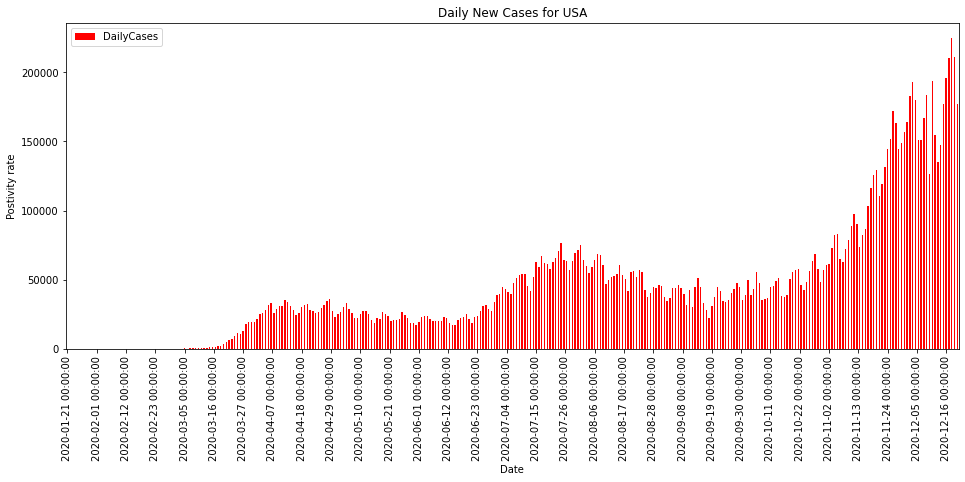

In [18]:
import datetime
plt.rcParams["figure.figsize"]=10,10
#ax=plt.gca()
fig, ax = plt.subplots(figsize=(16, 6))
date_list=pd.date_range(start="2020/01/10",end="2020/12/31",freq='11D').tolist()
import matplotlib.dates as mdates

#plt.plot(x,y)
US_daily.plot(kind='bar',x='date',y='DailyCases',color='red',ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(10.5))
#ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.set_xticklabels(date_list)
#plt.yticks(np.arange(0,4000000,1000000))
plt.xlabel('Date')
plt.ylabel('Postivity rate')
plt.title('Daily New Cases for USA')
plt.show()


In [19]:
fig=px.bar(US_daily,x='date',y="DailyCases",title="Daily Coronavirus Cases")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(marker_color='red')

fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Coronavirus Cases",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

## Dynamic Plot for Active Cases for USA

In [20]:
fig=px.line(US_daily,x='date',y="Active Cases",title="Active Covid-19 cases")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(line=dict(color='Blue',width=6))
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Active Cases",
        title_x=0.4,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

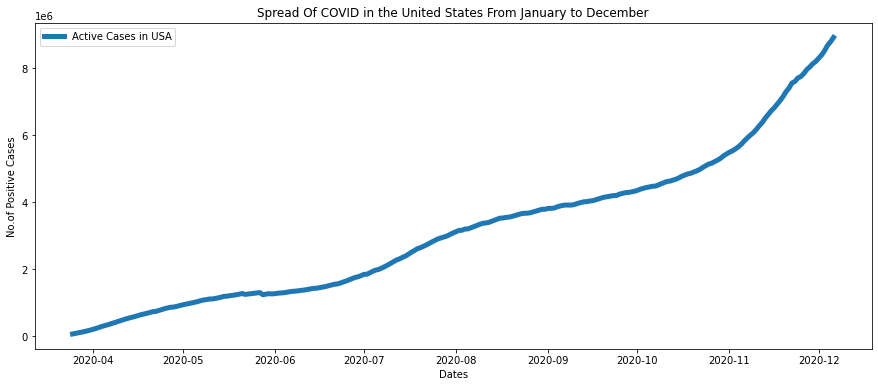

In [21]:
plt.figure(figsize=[15,6])
plt.plot(US_daily['date'],US_daily['Active Cases'],lw=5)
plt.title('Spread Of COVID in the United States From January to December')
plt.legend(['Active Cases in USA'],loc=2)
#plt.yticks(np.arange(0, 14000000,step=2000000))
plt.xlabel('Dates')
plt.ylabel('No.of Positive Cases')
plt.show()

In [22]:
US_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      320 non-null    datetime64[ns]
 1   states                    320 non-null    int64         
 2   positive                  320 non-null    int64         
 3   negative                  320 non-null    int64         
 4   pending                   278 non-null    float64       
 5   hospitalizedCurrently     265 non-null    float64       
 6   hospitalizedCumulative    278 non-null    float64       
 7   inIcuCurrently            256 non-null    float64       
 8   inIcuCumulative           257 non-null    float64       
 9   onVentilatorCurrently     257 non-null    float64       
 10  onVentilatorCumulative    250 non-null    float64       
 11  recovered                 257 non-null    float64       
 12  dateChecked           

## Dynamic Plot for showing Daily cases vs Recoveries

In [23]:
#US_daily['Daily New Cases']=US_daily['positive'].diff()
US_daily['Daily recoveries']=US_daily['recovered'].diff()
fig=px.line(US_daily,x='date',y=['Daily recoveries','DailyCases'],title="Daily Positive Cases Vs Daily Recoveries")
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(line=dict(width=4))
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.4,
        showlegend = True,
        legend_title=""
        )

        
fig.show()

## Static Plot for showing Daily cases vs Recoveries

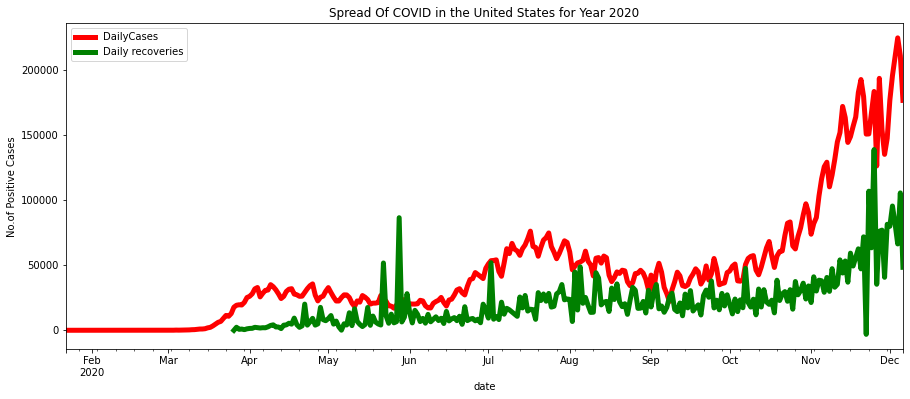

<Figure size 1440x720 with 0 Axes>

In [24]:
ax = plt.gca()
plt.title('Spread Of COVID in the United States for Year 2020')
plt.legend(['No.of Daily Positive Cases'],loc=2)
#plt.yticks(np.arange(0, 14000000,step=2000000))
plt.xlabel('Dates')
plt.ylabel('No.of Positive Cases')
US_daily['DailyTests']=US_daily['totalTestResults'].diff()


#US_daily.plot(kind='line',x='date',y='DailyTests',ax=ax)
US_daily.plot(kind='line',x='date',y='DailyCases', color='red', ax=ax,figsize=[15,6],lw=5)
US_daily.plot(kind='line',x='date',y='Daily recoveries',color='green',ax=ax,lw=5)

plt.figure(figsize=[20,10])
plt.show()

## Total Coronavirus Deaths in the United States


In [25]:
fig=px.line(US_daily,x='date',y="death",title="Total Coronavirus Deaths in the United States")

fig.update_traces(line=dict(color='orange',width=6))
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Total Coronavirus Deaths",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)        
fig.show()

## Daily New Deaths in the United States

In [26]:
fig=px.bar(US_daily,x='date',y="Daily deaths",title="Daily Coronavirus Deaths")
           #labels={'date':'date',
            #      ['Daily New Cases','Daily recoveries']:'Daily cases'})
#fig=px.line(US_daily,x='date',y='Daily recoveries')

#fig.add_trace(line=dict(color=['red','green'],width=4))

fig.update_traces(marker_color='darkgray')

fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Coronavirus Deaths",
        title_x=0.5,
        showlegend = True,
        legend_title="",
        width=1000,height=500)

        
fig.show()

## Dynamic plot for Top 10 affected states in terrms of postive cases

In [27]:
def Clean_US_state(dummy_US_state):
    #display(dummy_US_state.isnull().values.ravel().count())
    # Add new Year/Month Col and formatted the Year-Month-Day date field to Year/Month
    dummy_US_state['Day-Month-Year'] = pd.to_datetime(dummy_US_state['date']).apply(lambda x: '{day}-{month}-{year}'.format(day=x.day, month=x.month,year=x.year))
    
    #display(dummy_US_state.head())
    # sort by date in descending
    dummy_US_state = dummy_US_state.sort_values(by='date', ascending=True)

    dummy_US_state = dummy_US_state[['Day-Month-Year', 'state', 'totalTestResults', 'positive', 'negative', 'death']]
    
    #return dummy_US_state
    
    
    uniqueDataFrame = dummy_US_state.groupby(['state'], as_index=False).tail(1)

    #print(uniqueDataFrame)

    # sort by date in descending
    uniqueDataFrame = uniqueDataFrame.sort_values(by='positive', ascending=False)
    uniqueDataFrame = uniqueDataFrame.head(10)

    top10States = uniqueDataFrame['state']

    top10DataFrame = dummy_US_state['state'].isin(top10States)
    #display(dummy_US_state[top10DataFrame])
    return dummy_US_state[top10DataFrame]
    
    
    

# TotalCases for continental Vis vs Total Cases Reported
#
def barVisulization_totalcases(df):
    selectCol = df[['Day-Month-Year', 'state', 'totalTestResults', 'positive', 'negative', 'death']]
    #selectCol = selectCol.sort_values(by='total_cases', ascending=True)
    fig = plotlybar.bar(selectCol, x='positive', y='state', color='Day-Month-Year', orientation='h', hover_data=['positive','death'], height=1000, title="COVID-19  Top 10 affected States Vs Total Cases Reported")
    fig.show()
    
dummy_US_state=US_states_Covid
df=Clean_US_state(dummy_US_state)
barVisulization_totalcases(df)
    

## Dynamic plot for Top 10 affected states in daily cases

In [28]:
Final_State_Data[Final_State_Data['state']=='California'].tail()[['date','death','Daily death cases']]

,date,death,Daily death cases
15372,2020-12-02,19324.0,113.0
15427,2020-12-03,19437.0,113.0
15484,2020-12-04,19582.0,145.0
15540,2020-12-05,19791.0,209.0
15597,2020-12-06,19876.0,85.0


In [29]:
def Clean_US_state(dummy_US_state):
    #display(dummy_US_state.isnull().values.ravel().count())
    # Add new Year/Month Col and formatted the Year-Month-Day date field to Year/Month
    dummy_US_state['Day-Month-Year'] = pd.to_datetime(dummy_US_state['date']).apply(lambda x: '{day}-{month}-{year}'.format(day=x.day, month=x.month,year=x.year))
    
    #display(dummy_US_state.head())
    # sort by date in descending
    dummy_US_state = dummy_US_state.sort_values(by='date', ascending=True)

    dummy_US_state = dummy_US_state[['Day-Month-Year', 'state', 'totalTestResults', 'Daily Cases', 'Daily death cases', 'death','positiveIncrease']]
    
    uniqueDataFrame = dummy_US_state.groupby(['state'], as_index=False).tail(1)

    # sort by date in descending
    uniqueDataFrame = uniqueDataFrame.sort_values(by='Daily Cases', ascending=False)
    
    #display(uniqueDataFrame)
    uniqueDataFrame = uniqueDataFrame.head(10)

    top10States = uniqueDataFrame['state']

    top10DataFrame = dummy_US_state['state'].isin(top10States)
    #display(dummy_US_state[top10DataFrame])
    return dummy_US_state[top10DataFrame]
    
    
    

# TotalCases for continental Vis vs Total Cases Reported

def barVisulization_totalcases(df):
    selectCol = df[['Day-Month-Year', 'state', 'totalTestResults', 'Daily Cases', 'Daily death cases', 'death','positiveIncrease']]
    #selectCol = selectCol.sort_values(by='total_cases', ascending=True)
    fig = plotlybar.bar(selectCol, x='Daily Cases', y='state', color='Day-Month-Year', orientation='h', hover_data=['Daily death cases','Daily Cases'], height=1000, title="COVID-19  Top 10 affected States Vs Total deaths Reported")
    fig.show()
    
dummy_US_state=Final_State_Data
df=Clean_US_state(dummy_US_state)
barVisulization_totalcases(df)
    

In [30]:
#US_states_Covid[US_states_Covid['state']=='California']['Active Cases'].sum()
#US_states_Covid.tail()[['positiveIncrease','positive','state']]
US_states_Covid[US_states_Covid['state']=='Alaska'][['positive','positiveIncrease']].sum()
US_daily[['positiveIncrease','DailyCases']]

,positiveIncrease,DailyCases
0,0,NaN
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
315,195796,195796.0
316,210204,210204.0
317,224831,224831.0
318,211073,211073.0


# Assessing Lockdown in different states

In [31]:
State_Data = Final_State_Data[Final_State_Data['state']=='New York']

In [32]:
#State_Data['state'].value_counts()
#State_Data.columns

In [33]:
fig=px.bar(State_Data,x='date',y='Daily Cases',title="Coronavirus Daily cases for New York")
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
      

In [34]:
California_Data = Final_State_Data[Final_State_Data['state']=='California']

In [35]:
NewJersey_Data = Final_State_Data[Final_State_Data['state']=='New Jersey']

In [36]:
NewYork_Data = Final_State_Data[Final_State_Data['state']=='New York']

In [37]:
Alaska_Data = Final_State_Data[Final_State_Data['state']=='Alaska']

In [38]:
#Creating the sub datafrmaes is alanyse effect of lockdown in NewYork City

Before_Lockdown_date_list_NewYork=pd.date_range(start="2020/01/21",end="2020/03/15")
During_Lockdown_date_list_NewYork=pd.date_range(start="2020/03/21",end="2020/05/14")
After_Lockdown_date_list_NewYork=pd.date_range(start="2020/05/15",end="2020/12/06")

In [39]:
#dataframes in dates for Newyork city before lockdown
NY_boolean_series1 = NewYork_Data.date.isin(Before_Lockdown_date_list_NewYork)
NewYork_before_lockdown_df = NewYork_Data[NY_boolean_series1]

#dataframes in dates for Newyork city during lockdown
NY_boolean_series2 = NewYork_Data.date.isin(During_Lockdown_date_list_NewYork)
NewYork_during_lockdown_df = NewYork_Data[NY_boolean_series2]

#dataframes in dates for Newyork city after lockdown
NY_boolean_series3 = NewYork_Data.date.isin(After_Lockdown_date_list_NewYork)
NewYork_After_lockdown_df = NewYork_Data[NY_boolean_series3]

In [40]:
NewYork_After_lockdown_df

,date,Postal Code,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,...,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,Active Cases,Daily Cases,Daily death cases,Day-Month-Year
4148,2020-05-15,NY,New York,345813.0,NaN,992235.0,NaN,totalTestEncountersViral,1338048.0,6394.0,...,0,0,0,0,0,NaN,285511.0,2762.0,134.0,15-5-2020
4205,2020-05-16,NY,New York,348232.0,NaN,1030485.0,NaN,totalTestEncountersViral,1378717.0,6220.0,...,0,0,0,0,0,NaN,287436.0,2419.0,174.0,16-5-2020
4260,2020-05-17,NY,New York,350121.0,NaN,1063275.0,NaN,totalTestEncountersViral,1413396.0,5897.0,...,0,0,0,0,0,NaN,288740.0,1889.0,141.0,17-5-2020
4316,2020-05-18,NY,New York,351371.0,NaN,1088186.0,NaN,totalTestEncountersViral,1439557.0,5840.0,...,0,0,0,0,0,NaN,289690.0,1250.0,110.0,18-5-2020
4372,2020-05-19,NY,New York,352845.0,NaN,1114894.0,NaN,totalTestEncountersViral,1467739.0,5818.0,...,0,0,0,0,0,NaN,290959.0,1474.0,114.0,19-5-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15404,2020-12-02,NY,New York,664238.0,NaN,19097486.0,NaN,totalTestEncountersViral,19761724.0,3924.0,...,0,0,0,0,0,NaN,578037.0,8973.0,73.0,2-12-2020
15461,2020-12-03,NY,New York,674093.0,NaN,19291071.0,NaN,totalTestEncountersViral,19965164.0,4063.0,...,0,0,0,0,0,NaN,587892.0,9855.0,66.0,3-12-2020
15516,2020-12-04,NY,New York,685364.0,NaN,19488097.0,NaN,totalTestEncountersViral,20173461.0,4222.0,...,0,0,0,0,0,NaN,598726.0,11271.0,62.0,4-12-2020
15572,2020-12-05,NY,New York,696125.0,NaN,19692737.0,NaN,totalTestEncountersViral,20388862.0,4318.0,...,0,0,0,0,0,NaN,608652.0,10761.0,72.0,5-12-2020


In [41]:
#Creating the sub datafrmaes is alanyse effect of lockdown in NewYork City

Before_Lockdown_date_list_California=pd.date_range(start="2020/01/21",end="2020/03/18")
During_Lockdown_date_list_California=pd.date_range(start="2020/03/19",end="2020/05/08")
After_Lockdown_date_list_California=pd.date_range(start="2020/05/09",end="2020/07/12")
During_Lockdown2_date_list_California=pd.date_range(start="2020/07/14",end="2020/08/31")
After_Lockdown2_date_list_California=pd.date_range(start="2020/09/01",end="2020/12/06")


In [42]:
During_Lockdown_date_list_California

DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
               '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08'],
              dtype='datetime64[ns]', freq='D')

In [43]:
#dataframes in dates for California city before lockdown
CA_boolean_series1 = California_Data.date.isin(Before_Lockdown_date_list_California)
California_before_lockdown_df = California_Data[CA_boolean_series1]

#dataframes in dates for CA city during lockdown
CA_boolean_series2 = California_Data.date.isin(During_Lockdown_date_list_California)
California_during_lockdown_df = California_Data[CA_boolean_series2]

#dataframes in dates for CA city after lockdown
CA_boolean_series3 = California_Data.date.isin(After_Lockdown_date_list_California)
California_after_lockdown_df = California_Data[CA_boolean_series3]

#dataframes in dates for CA city during lockdown2
CA_boolean_series4 = California_Data.date.isin(During_Lockdown2_date_list_California)
California_during_lockdown2_df = California_Data[CA_boolean_series4]

#dataframes in dates for Newyork city after lockdown2
CA_boolean_series5 = California_Data.date.isin(After_Lockdown2_date_list_California)
California_after_lockdown2_df = California_Data[CA_boolean_series5]

In [44]:
##Creating the sub datafrmaes is alanyse effect of lockdown in NewYork City

Before_Lockdown_date_list_Alaska=pd.date_range(start="2020/01/21",end="2020/03/13")
During_Lockdown_date_list_Alaska=pd.date_range(start="2020/03/14",end="2020/05/19")
After_Lockdown_date_list_Alaska=pd.date_range(start="2020/05/20",end="2020/12/06")

In [45]:
#dataframes in dates for Alaska city before lockdown
AL_boolean_series1 = Alaska_Data.date.isin(Before_Lockdown_date_list_Alaska)
Alaska_before_lockdown_df = Alaska_Data[AL_boolean_series1]

#dataframes in dates for Alaska city during lockdown
AL_boolean_series2 = Alaska_Data.date.isin(During_Lockdown_date_list_Alaska)
Alaska_during_lockdown_df = Alaska_Data[AL_boolean_series2]

#dataframes in dates for Alaska city after lockdown
AL_boolean_series3 = Alaska_Data.date.isin(After_Lockdown_date_list_Alaska)
Alaska_After_lockdown_df = Alaska_Data[AL_boolean_series3]

In [46]:
Alaska_before_lockdown_df

,date,Postal Code,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,...,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,Active Cases,Daily Cases,Daily death cases,Day-Month-Year
254,2020-03-06,AK,Alaska,NaN,NaN,8.0,1.0,totalTestsViral,8.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,6-3-2020
299,2020-03-07,AK,Alaska,NaN,NaN,12.0,2.0,totalTestsViral,12.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,7-3-2020
350,2020-03-08,AK,Alaska,NaN,NaN,14.0,6.0,totalTestsViral,14.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,8-3-2020
391,2020-03-09,AK,Alaska,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,9-3-2020
454,2020-03-10,AK,Alaska,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,10-3-2020
504,2020-03-11,AK,Alaska,NaN,NaN,46.0,14.0,totalTestsViral,46.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,11-3-2020
553,2020-03-12,AK,Alaska,NaN,NaN,46.0,14.0,totalTestsViral,46.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,12-3-2020
606,2020-03-13,AK,Alaska,NaN,NaN,60.0,NaN,totalTestsViral,60.0,NaN,...,0,0,0,0,0,NaN,NaN,NaN,0.0,13-3-2020


In [47]:
fig=px.bar(California_Data,x='date',y='Daily Cases',title='Daily Coronavirus Cases for California')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)

In [48]:
fig=px.bar(Alaska_Data,x='date',y='Daily Cases',title='Daily Coronavorus cases for Alaska')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)

In [49]:
#Plot for Spread of COVID-19 in NewYork in the initial stages before lockdown

fig= px.bar(NewYork_before_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in NewYork in early 2020')
fig.update_traces(marker_color='blue')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.show()

In [50]:
#Plot for Spread of COVID-19 in NewYork after the removal of lockdown

fig= px.bar(NewYork_during_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in NewYork During the Lockdown')
fig.update_traces(marker_color='red')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.show()

In [51]:
#Plot for Spread of COVID-19 in NewYork in the initial stages before lockdown

fig = px.bar(NewYork_After_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona After the Lockdown in NewYork')
fig.update_traces(marker_color='green')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
#fig.update_layout(width=1000,height=500)
fig.show()

In [52]:
#Plot for Spread of COVID-19 in Claifornia in the initial stages before lockdown

fig = px.bar(California_before_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in Claifornia in early 2020')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.show()

In [53]:
#Plot for Spread of COVID-19 in Claifornia during the lockdown

fig = px.bar(California_during_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in California during First Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.update_traces(marker_color='black')
fig.show()

In [54]:
#Plot for Spread of COVID-19 in Claifornia after the First lockdown

fig = px.bar(California_after_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in California After First Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.show()

In [55]:
#Plot for Spread of COVID-19 in Claifornia during the Secondlockdown

fig = px.bar(California_during_lockdown2_df, x="date", y="Daily Cases", title='Spread Of Corona in California during Second Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
#fig1.update_traces(marker_color='green')
fig.show()

In [56]:
#Plot for Spread of COVID-19 in Claifornia after the Second lockdown

fig = px.bar(California_after_lockdown2_df, x="date", y="Daily Cases", title='Spread Of Corona in California After Second Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
#fig.update_traces(marker_color='grey')
fig.show()

In [57]:
#Plot for Spread of COVID-19 in Alaska in the initial stages before lockdown

fig = px.bar(Alaska_before_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in Alaska in early 2020')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.show()

In [58]:
#Plot for Spread of COVID-19 in Alaska during the lockdown


fig = px.bar(Alaska_during_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in Alaska during Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
#fig.update_traces(marker_color='black')
fig.show()

In [59]:
#Plot for Spread of COVID-19 in Alaska after the lockdown

fig = px.bar(Alaska_After_lockdown_df, x="date", y="Daily Cases", title='Spread Of Corona in Alaska after Lockdown')
fig.update_layout(
        #title_text = 'Covid-19 deaths In The United States By Geography',
        yaxis_title="Daily Cases",
        title_x=0.5,
        #showlegend = True,
        #legend_title="",
        width=1000,height=500)
fig.update_traces(marker_color='green')
fig.show()